In [76]:
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import os
import pandas as pd
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")



In [77]:
nombre_archivo = ["Presupuesto_mensual_2021.xlsx", "Presupuesto_mensual_2022.xlsx", "Presupuesto_mensual_2023.xlsx", "Presupuesto_mensual_2024.xlsx"]
rango_hojas = list(range(1,13))

def excel_a_df(archivo, rango_hojas):
    df_compras = pd.DataFrame() #df vacio para almacenar los resultados
    for a in archivo:
        try:
            datos = pd.read_excel(a, sheet_name= rango_hojas, header= None, skiprows= 5)
            #concatenar todas las hojas de los arhicvos en el df final
            for hoja, df in datos.items():
                df_compras = pd.concat([df_compras, df], ignore_index= True) #directamente concatena
            #manejo de errores
        except ValueError as e:
            #print(f"Algunas hojas especificadas no existen en {archivo}: {e}")
            continue
        except Exception as e:
            #print(f"Error inesperado al procesar el libro {a} y la hoja {l}")
            continue
    return df_compras 


In [78]:
df = excel_a_df(nombre_archivo, rango_hojas)

In [79]:
#eliminar columnas que no voy a ocupar
df_completo = df.drop([0,4,7,8,9], axis = 1)
#verificar que se han eliminado las columnas

In [ ]:
#pd.set_option('display.max_rows', None)
df_completo


In [81]:
#ponerle nombre a las columnas
df_completo.columns = ['Fecha', 'Precio', 'Producto', 'Lugar', 'Categoria']
df_completo.sample()

,Fecha,Precio,Producto,Lugar,Categoria
1609,2023-02-02,35.46,Avion,NaN,Viajes


In [82]:
#verificar los tipos de datos y hacer cambios donde se requiera
df_completo.dtypes

Fecha        datetime64[ns]
Precio              float64
Producto             object
Lugar                object
Categoria            object
dtype: object

In [83]:
#convertir la columna precio de object a float
df_completo['Precio'] = pd.to_numeric(df_completo['Precio'], errors='coerce')
df_completo['Precio'].dtype

dtype('float64')

In [84]:
#Reemplazar algunos valores de Categoria para unificar criterios

df_completo['Categoria'] = df_completo['Categoria'].replace(
    {'Supermercado Otros': 'Supermercado', 
     'Comida': 'Supermercado', 
     'Comidas': 'Supermercado', 
     'Supermercados':'Supermercado',
     'Carnes': 'Supermercado',
     'Varios': 'Otros',
     'Salud/médicos': 'Farmacia'}
)

print(df_completo['Categoria'].unique())

['Vivienda' 'Supermercado' 'Farmacia' 'Salidas'
 'Suministros (luz, agua, gas, etc.)' 'Tramites' 'Transporte' 'Viajes' nan
 'Otros' 'Gastos personales' 'Gimnasio' 'Frutas/Verduras' 'Bebidas'
 'Limpieza']


In [103]:
#Reemplazar algunos valores de Lugar para unificar criterios

df_completo['Lugar'] = df_completo['Lugar'].replace(
    {'carrefour': 'Carrefour',
     'Carrefuour': 'Carrefour' })

print(df_completo['Lugar'].unique())

['Chino' 'Mercadona' 'Lidl' 'Carrefour' 'Tejerinos ' 'Blend cafe' 'Amazon'
 'Maskom' nan 'La canasta' 'Copy' 'Tejerinos' 'Bk' 'Lidl ' 'Telepizza'
 'Farmacia' 'Tincho' 'Cabify' 'Margarita' 'Uber eats' 'Burguer king'
 'Mercadona ' 'Dia' 'Valdi' 'Morriseys' 'Smash' 'Sprinter' 'Verduleria'
 'Mafalda' 'Bella julieta' '100monta' 'Carrefour ' 'Feria' ' ' 'Primor'
 'Pucino' 'Too good to go ' 'Kebab' 'China' 'La romana' 'Masgo' 'Carnicas'
 'Mas&go' 'La ventana' 'La sureña' 'Yego' 'Forus' 'Burguer parrilla'
 'Yelmo vialia' 'Antequera' 'Carniceria' 'Cafe negro' 'Fali'
 'Carniceria argentina' 'Padilla' 'Mitos' 'Cumple eli' '100 montaditos'
 'Glovo' 'Fruteria' 'Rey kebaba' 'Albolote' 'Repsol' 'Mascom' 'Sony'
 'Airbnb' 'Gofit' 'La argento' 'Yelmo' 'App' 'Che bolu' '100 motaditos'
 'Corte ingles' 'Go fit' 'Vittoria' 'Casa mira' 'Verdulera' 'Metro'
 'Continente ' 'Vivero' 'Dos clerigos' 'Frankie hot dog' 'Continente'
 'Carreofur' 'Miniprecio' 'Samu' 'Salvador' 'Click rent' 'Cordoba'
 'Argenta' 'Pomodo

In [86]:
#Cambiar la primera letra a mayúscula

df_completo['Producto'] = df_completo['Producto'].str.capitalize()
df_completo['Lugar'] = df_completo['Lugar'].str.capitalize()

#verificar

print(df_completo.sample())


          Fecha  Precio Producto Lugar     Categoria
1483 2023-01-03    1.61   Banana   NaN  Supermercado


In [87]:
df_completo['Producto'] = df_completo['Producto'].replace(
    {'Jamon cocido': 'Jamon', 
     'Jamon lonchas': 'Jamon', 
     'Jamon en lonchas': 'Jamon', 
     'jamon york':'Jamon',
     'Lonchas jamon': 'Jamon',
     'Huevo': 'Huevos',
     'Queso': 'Queso en lonchas',
     'Queso lonchas': 'Queso en lonchas',
     'Lonchas queso': 'Queso en lonchas',
     'Leche desnatada': 'Leche',
     'Leche semi desnatada': 'Leche',
     'Leche sin lactosa': 'Leche'
     }
)



In [88]:
# Eliminar filas donde la columna 'fecha' tenga valores nulos
df_completo = df_completo.dropna(subset=['Fecha'])


In [89]:
# Convertir la columna fecha a formato datetime
df_completo['Fecha'] = pd.to_datetime(df_completo['Fecha'])

/var/folders/nm/scqkx_px2cv2000nz2c7h6j80000gp/T/ipykernel_893/497231172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo['Fecha'] = pd.to_datetime(df_completo['Fecha'])


In [90]:
# Comprobar si hay valores negativos o fuera de rango en la columna Precio
print(df_completo['Precio'].describe())

count    4094.000000
mean        6.108630
std        15.926063
min       -30.540000
25%         1.300000
50%         2.150000
75%         4.540000
max       370.000000
Name: Precio, dtype: float64


In [91]:
#Comprobar porcentaje de nulos

porcentaje_nulos_precio = (df_completo['Precio'].isna().mean()) * 100
print(f"Porcentaje de nulos en la columna 'precio': {porcentaje_nulos_precio:.2f}%")


Porcentaje de nulos en la columna 'precio': 0.00%


In [92]:
#Eliminar los valores negativos
df_completo = df_completo[df_completo['Precio'] >= 0]


In [104]:
#guardar en csv para ocuparlo cuando quiero continuar con el trabajo y no tener que recargar el código completo

df_completo.to_csv("compras_anuales.csv")

In [105]:
#Abrir csv para empezar a graficar

df_completo = pd.read_csv("compras_anuales.csv")

### Gráficos

/var/folders/nm/scqkx_px2cv2000nz2c7h6j80000gp/T/ipykernel_893/706112693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Año', y='Media de Gastos', data = media_anual, palette='Blues_d')


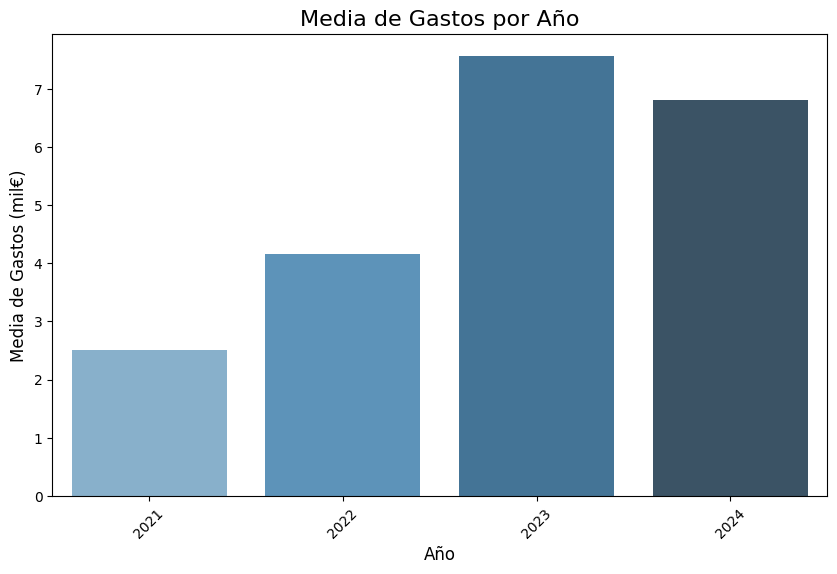

In [99]:
plt.figure(figsize=(10,6))
sns.barplot(x='Año', y='Media de Gastos', data = media_anual, palette='Blues_d')
plt.title('Media de Gastos por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Media de Gastos (mil€)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

/var/folders/nm/scqkx_px2cv2000nz2c7h6j80000gp/T/ipykernel_893/1815684374.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Precio', data=gasto_categoria_top5, palette='Set2')


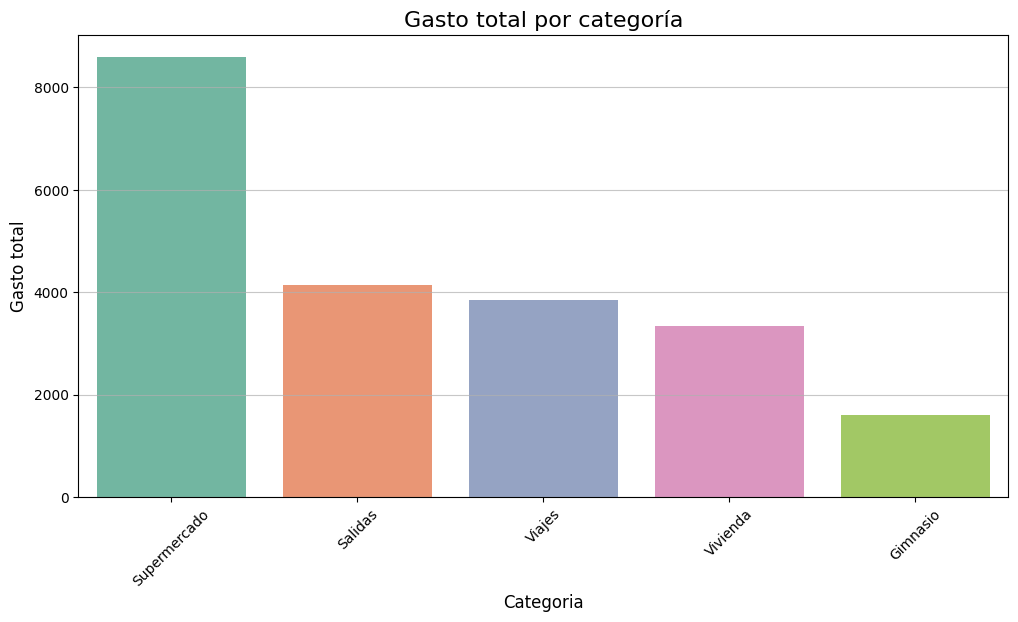

In [96]:
#Gráfico de gasto total por categoría

#Agrupar por categoría y calcular el gasto total de cada una

gasto_categoria = df_completo.groupby('Categoria')['Precio'].sum().reset_index()

#Ordenar por gasto total
gasto_categoria = gasto_categoria.sort_values('Precio', ascending=False)

# Obtener solo las 5 categorías con mayor gasto
gasto_categoria_top5 = gasto_categoria.head(5)

#Gráfico
plt.figure(figsize=(12,6))
sns.barplot(x='Categoria', y='Precio', data=gasto_categoria_top5, palette='Set2')
plt.title('Gasto total por categoría', fontsize = 16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Gasto total', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha = 0.7)
plt.show()

/var/folders/nm/scqkx_px2cv2000nz2c7h6j80000gp/T/ipykernel_893/1099181891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Media gastos', y='Categoria', data=media_categoria, palette='Greens_d')


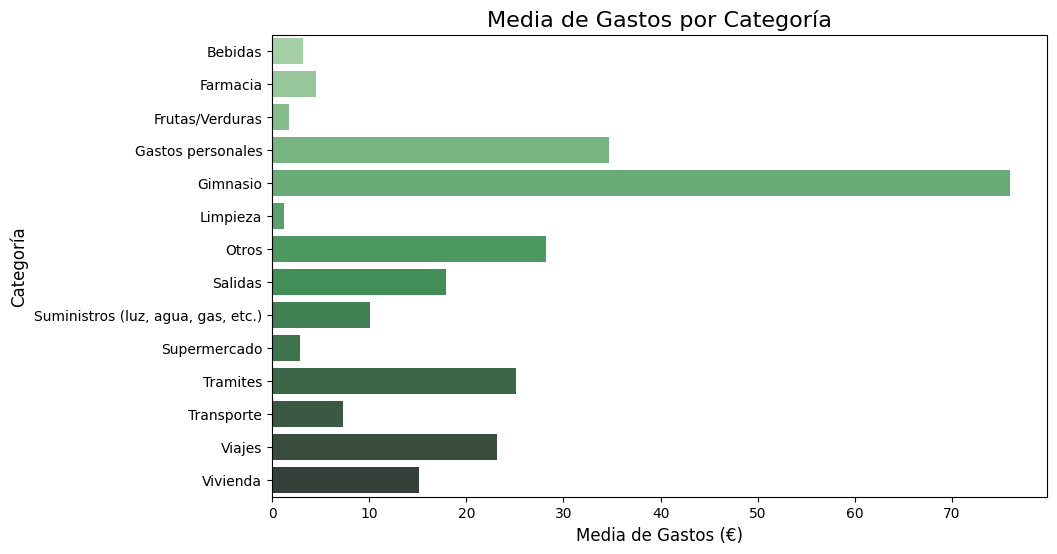

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Media gastos', y='Categoria', data=media_categoria, palette='Greens_d')
plt.title('Media de Gastos por Categoría', fontsize=16)
plt.xlabel('Media de Gastos (€)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.show()

/var/folders/nm/scqkx_px2cv2000nz2c7h6j80000gp/T/ipykernel_893/1256362784.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lugar', y = 'Precio', data=gasto_lugar_top5, palette='Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

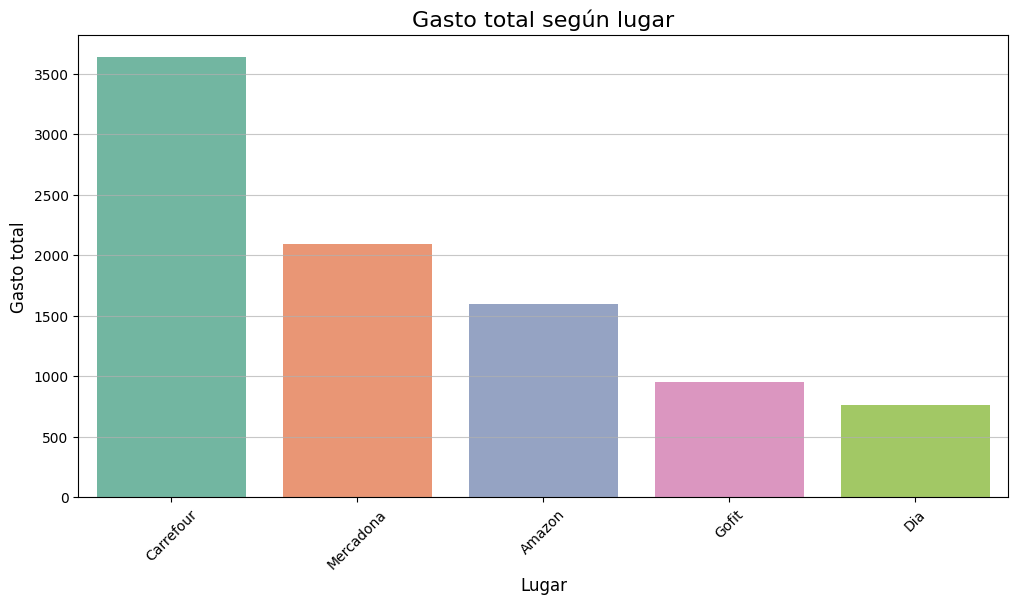

In [106]:
#Gasto total por lugar
#agrupar segun lugar y sumar lo gastado en cada lugar
gasto_lugar = df_completo.groupby('Lugar')['Precio'].sum().reset_index()

#ordenar por gasto

gasto_lugar = gasto_lugar.sort_values('Precio', ascending = False)

# Obtener solo las 5 lugares donde más se gasto
gasto_lugar_top5 = gasto_lugar.head(5)

#Graficar

plt.figure(figsize=(12,6))
sns.barplot(x='Lugar', y = 'Precio', data=gasto_lugar_top5, palette='Set2')
plt.title('Gasto total según lugar', fontsize=16)
plt.xlabel('Lugar', fontsize=12)
plt.ylabel('Gasto total', fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(axis='y', alpha = 0.7)
plt.show


/var/folders/nm/scqkx_px2cv2000nz2c7h6j80000gp/T/ipykernel_893/412391730.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_productos.values, y=top_productos.index, palette='viridis')


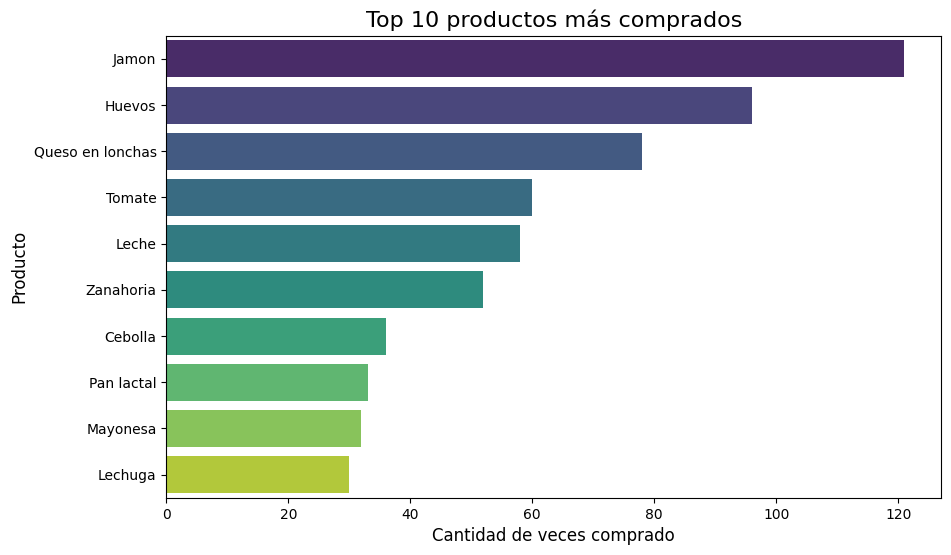

In [98]:
#Top N productos mas comprados

mas_comprados = df_completo['Producto'].value_counts()

#Seleccionar los 10 productos más comprados

top_productos = mas_comprados.head(10)

#Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x = top_productos.values, y=top_productos.index, palette='viridis')
plt.title('Top 10 productos más comprados', fontsize = 16)
plt.xlabel('Cantidad de veces comprado', fontsize = 12)
plt.ylabel('Producto', fontsize = 12)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

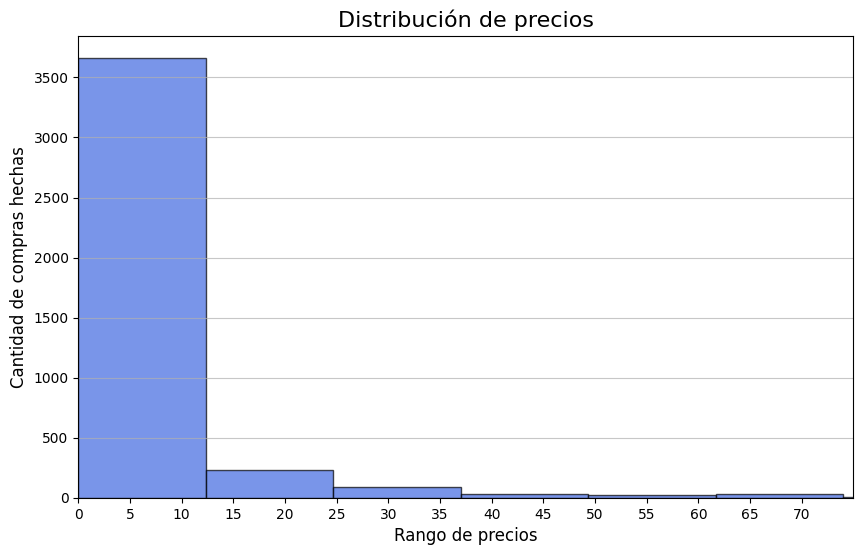

In [95]:
#Histograma para ver la distribución general de los precios

plt.figure(figsize=(10, 6))
plt.hist(df_completo['Precio'], bins = 30, color='royalblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de precios', fontsize = 16)
plt.xlabel('Rango de precios', fontsize=12)
plt.ylabel('Cantidad de compras hechas', fontsize=12)
plt.grid(axis = 'y', alpha=0.7)
plt.xlim(0, 75)  # Limitar el eje X entre 0 y 200
plt.xticks(np.arange(0, 75, 5)) #configurar el eje x para que vaya de 5 en 5
plt.show